In [23]:
from enum import Enum
import numpy as np
from matplotlib.image import imread
from matplotlib.pyplot import imshow
from matplotlib.image import imsave
from matplotlib import pyplot as plt
import math

In [24]:
class ColorModel(Enum):
    rgb = 0
    hsv = 1
    hsi = 2
    hsl = 3
    gray = 4  # obraz 2d

In [131]:
class BaseImage:

    data: np.ndarray  # tensor przechowujacy piksele obrazu
    color_model: ColorModel  # atrybut przechowujacy biezacy model barw obrazu

    def __init__(self, path: str = None) -> None:
        self.data = imread(path)
        if path is None:
            return
        else:
            self.data = imread(path)

    def save_img(self, path: str) -> None:
        self.data = imsave('image.jpg', path)
        return

    def show_img(self) -> None:
        imshow(self.data)
        return

    def to_hsv(self) -> 'BaseImage':
       hsv = np.empty(self.data.shape)
       for x in range(self.data.shape[0]):
           for y in range(self.data.shape[1]):

               r = self.data[x, y][0].astype(np.float16)
               g = self.data[x, y][1].astype(np.float16)
               b = self.data[x, y][2].astype(np.float16)

               M = max(r, g, b)
               m = min(r, g, b)
               V = (M / 255)
               if M > 0:
                   S = 1 - m/M
               else:
                   S = 0

               denominator = (r*r + g*g + b*b - r*g - r*b - g*b)

               if g >= b:
                   H = math.cos((r - (0.5*g) - (0.5*b)) / math.sqrt(denominator)) ** (-1)
               else:
                   H = 360 - math.cos((r - (0.5*g) - (0.5*b))/ math.sqrt(denominator)) ** (-1)

               hsv[x, y][0] = H
               hsv[x, y][1] = S*100
               hsv[x, y][2] = V*100

       hsv_image = BaseImage('lena.jpg')
       hsv_image.data = hsv.astype('uint8')
       hsv_image.color_model = ColorModel.hsv
       return hsv_image

    def to_hsi(self) -> 'BaseImage':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsi
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        hsi = np.empty(self.data.shape)
        for x in range(self.data.shape[0]):
            for y in range(self.data.shape[1]):

                r = self.data[x, y][0].astype(np.float16)
                g = self.data[x, y][1].astype(np.float16)
                b = self.data[x, y][2].astype(np.float16)

                M = max(r, g, b)
                m = min(r, g, b)
                I = (r+g+b)/3

                if M > 0:
                    S = 1 - m/M
                else:
                    S = 0

                denominator = (r*r + g*g + b*b - r*g - r*b - g*b)

                if g >= b:
                    H = math.cos((r - (0.5*g) - (0.5*b)) / math.sqrt(denominator)) ** (-1)
                else:
                    H = 360 - math.cos((r - (0.5*g) - (0.5*b)) / math.sqrt(denominator)) ** (-1)

                hsi[x, y][0] = H
                hsi[x, y][1] = S*100
                hsi[x, y][2] = I*100

        hsi_image = BaseImage('lena.jpg')
        hsi_image.data = hsi.astype('uint8')
        hsi_image.color_model = ColorModel.hsv
        return hsi_image

    def to_hsl(self) -> 'BaseImage':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsl
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        hsl = np.empty(self.data.shape)
        for x in range(self.data.shape[0]):
            for y in range(self.data.shape[1]):

                r = self.data[x, y][0].astype(np.float16)
                g = self.data[x, y][1].astype(np.float16)
                b = self.data[x, y][2].astype(np.float16)

                M = max(r, g, b)
                m = min(r, g, b)
                d = (M-m) / 255
                L = (0.5*(M+m)) / 255

                if L > 0:
                    S = d / (1-abs(2*L-1))
                else:
                    S = 0

                denominator = (r*r + g*g + b*b - r*g - r*b - g*b)

                if g >= b:
                    H = math.cos((r - (0.5*g) - (0.5*b)) / math.sqrt(denominator)) ** (-1)
                else:
                    H = 360 - math.cos((r - (0.5*g) - (0.5*b)) / math.sqrt(denominator)) ** (-1)

                hsl[x, y][0] = H
                hsl[x, y][1] = S*100
                hsl[x, y][2] = L*100

        hsl_image = BaseImage('lena.jpg')
        hsl_image.data = hsl.astype('uint8')
        hsl_image.color_model = ColorModel.hsv
        return hsl_image

    def to_rgb(self) -> 'BaseImage':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu rgb
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        rgb = np.empty(self.data.shape)
        if self.color_model == ColorModel.hsv:
            for x in range(self.data.shape[0]):
                for y in range(self.data.shape[1]):

                    H = self.data[x, y][0].astype(np.float16)
                    S = self.data[x, y][1].astype(np.float16)
                    V = self.data[x, y][2].astype(np.float16)

                    M = 255*V
                    m = M*(1-S)
                    z = (M-m)*(1-abs(((H/60)%2)-1))

                    if H >= 0 & H < 60:
                        r = M
                        g = z + m
                        b = m

                    elif H >= 60 & H < 120:
                        r = z + m
                        g = M
                        b = m

                    elif H >= 120 & H < 180:
                        r = m
                        g = M
                        b = z + m

                    elif H >= 180 & H < 240:
                        r = m
                        g = M
                        b = z + m

                    elif H >= 240 & H < 300:
                        r = z + m
                        g = m
                        b = M

                    elif H >= 300 & H < 360:
                        r = M
                        g = m
                        b = z + m

                    rgb[x, y][0] = r
                    rgb[x, y][1] = g
                    rgb[x, y][2] = b

        elif self.color_model == ColorModel.hsi:
            for x in range(self.data.shape[0]):
                for y in range(self.data.shape[1]):

                    H = self.data[x, y][0].astype(np.float16)
                    S = self.data[x, y][1].astype(np.float16)
                    I = self.data[x, y][2].astype(np.float16)

                    if H == 0:
                        r = I + 2*I*S
                        g = I - I*S
                        b = I - I*S

                    elif H > 0 & H < 120:
                        r = I + I*S*math.cos(H)/math.cos(60-H)
                        g = I + I*S*(1-math.cos(H)/math.cos(60-H))
                        b = I*S

                    elif H == 120:
                        r = I - I*S
                        g = I + 2*I*S
                        b = I - I*S

                    elif H > 120 & H < 240:
                        r = I - I*S
                        g = I + I*S*math.cos(H-120)/math.cos(180-H)
                        b = I + I*S*(1-math.cos(H-120)/math.cos((180-H)))

                    elif H == 240:
                        r = I - I*S
                        g = I - I*S
                        b = I + 2*I*S

                    elif H > 240 & H < 360:
                        r = I - I*S*(1-math.cos(H-240)/math.cos(300-H))
                        g = I - I*S
                        b = I + I*S*math.cos(H-240)/math.cos((300-H))

                    rgb[x, y][0] = r
                    rgb[x, y][1] = g
                    rgb[x, y][2] = b

        rgb_image = BaseImage('lena.jpg')
        rgb_image.data = rgb.astype('uint8')
        rgb_image.color_model = ColorModel.rgb
        return rgb_image

class GrayScaleTransform(BaseImage):

    def to_gray(self) -> 'BaseImage':
        """
        metoda zwracajaca obraz w skali szarosci jako obiekt klasy BaseImage
        """
        gray = np.empty(self.data.shape)
        for x in range(self.data.shape[0]):
            for y in range(self.data.shape[1]):

                r = self.data[x, y][0].astype(np.float16)
                g = self.data[x, y][1].astype(np.float16)
                b = self.data[x, y][2].astype(np.float16)

                gray[x, y][0] = (r+g+b)/3
                gray[x, y][1] = (r+g+b)/3
                gray[x, y][2] = (r+g+b)/3

        gray_image = BaseImage('lena.jpg')
        gray_image.data = gray.astype('uint8')
        gray_image.color_model = ColorModel.gray
        return gray_image

    def to_sepia(self, alpha_beta: tuple = (None, None), w: int = None) -> BaseImage:
        """
        metoda zwracajaca obraz w sepii jako obiekt klasy BaseImage
        sepia tworzona metoda 1 w przypadku przekazania argumentu alpha_beta
        lub metoda 2 w przypadku przekazania argumentu w
        """
        sepia = np.empty(self.data.shape)

        L0 = self.data[:, :][0].astype(np.float16)
        L1 = self.data[:, :][1].astype(np.float16)
        L2 = self.data[:, :][2].astype(np.float16)

        sepia[:, :][0] = L0*1.2
        sepia[:, :][1] = L1
        sepia[:, :][2] = L2*0.8

        sepia_image = BaseImage('lena.jpg')
        sepia_image.data = sepia.astype('uint8')
        return sepia_image

class Image(GrayScaleTransform):
    """
    klasa stanowiaca glowny interfejs biblioteki
    w pozniejszym czasie bedzie dziedziczyla po kolejnych klasach
    realizujacych kolejne metody przetwarzania obrazow
    """
    # def __init__(self, ...) -> None:
    #     pass


In [132]:
lena = BaseImage('lena.jpg')

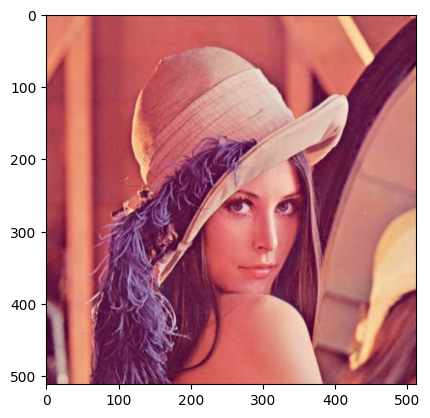

In [133]:
lena.show_img()

In [134]:
lena = GrayScaleTransform('lena.jpg')

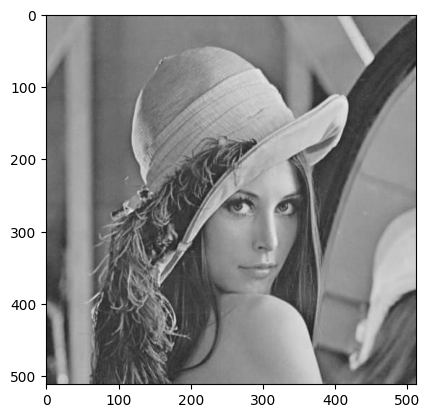

In [135]:
lena.to_gray().show_img()

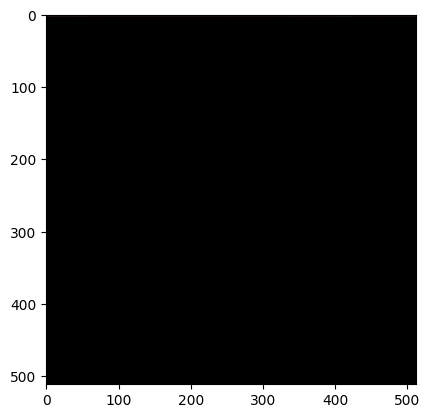

In [136]:
lena.to_sepia().show_img()

In [137]:
lena.to_sepia().data

array([[[ 15, 163, 152],
        [ 14, 162, 151],
        [ 14, 162, 151],
        ...,
        [ 26, 181, 147],
        [  3, 162, 127],
        [229, 132,  97]],

       [[226, 136, 127],
        [226, 136, 127],
        [226, 136, 127],
        ...,
        [228, 144, 120],
        [208, 126, 102],
        [184, 102,  78]],

       [[181, 109, 102],
        [181, 109, 102],
        [180, 108, 100],
        ...,
        [184, 115, 101],
        [168, 102,  88],
        [151,  84,  70]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]